In [125]:
import numpy as np
import proplot as plot
import sys, os
k, A, L = (1/4000),20, 15000
def func(z,y,x,k, A, L):
    f = (A*np.pi/(L*k))*(-1-2*k*z+np.exp(k*z))*(-np.sin((2*np.pi*y)/L) +np.cos((2*np.pi*x)/L))+1
    return f

# add location of local leroy modules to sys.path and import them
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('leroy.py'))))
import leroy 


In [126]:
xi, yi = np.linspace(0,15000,10),np.linspace(0,15000,10)
zi = np.linspace(500,5000,100)
z,y,x = np.meshgrid(zi,yi,xi, indexing = 'ij')
yidx, xidx = 5,5

In [127]:
f = func(z,y,x,k, A, L)

In [167]:
els = np.linspace(15,44,6)
zobs = 5000*np.tan(np.radians(els))
xobs, yobs = xi[xidx], yi[yidx]
zobs, yobs, xobs = np.meshgrid(zobs, yobs, xobs, indexing = 'ij')
fobs = func(zobs,yobs,xobs,k, A, L)
zobp = [[0,z] for z in np.squeeze(zobs)]
fobp = [[0,f] for f in np.squeeze(fobs)]


In [168]:
xg, yg = 0,0
zg = np.arange(500,5001,500)
zg,yg,xg = np.meshgrid(zg,yg,xg, indexing = 'ij')

In [169]:
f_lin = leroy.interp_along_axis(fobs, zobs, zg, axis=0, method='linear')
print(f_lin.shape)

(10, 1, 1)


/home/564/jb2354/dev/leroy/leroy.py:190: UserWarning: Some values are outside the interpolation range. These will be filled with NaN
  warnings.warn("Some values are outside the interpolation range. "
/home/564/jb2354/dev/leroy/leroy.py:232: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  f0, f1 = _y[[i_lower]+ind], _y[[i_upper]+ind]
/home/564/jb2354/dev/leroy/leroy.py:223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x_lower = _x[[i_lower]+ind]
/home/564/jb2354/dev/leroy/leroy.py:224: FutureWarning: Using a non-tuple sequence for multidim

In [170]:
f_miss = np.ones(f_lin.shape)*np.nan
mask = np.isnan(f_lin)[:,0,0]
miss_data = func(zg[mask, :,:], yi[yidx],xi[xidx],k, A, L)
f_miss[mask, :, :] = miss_data


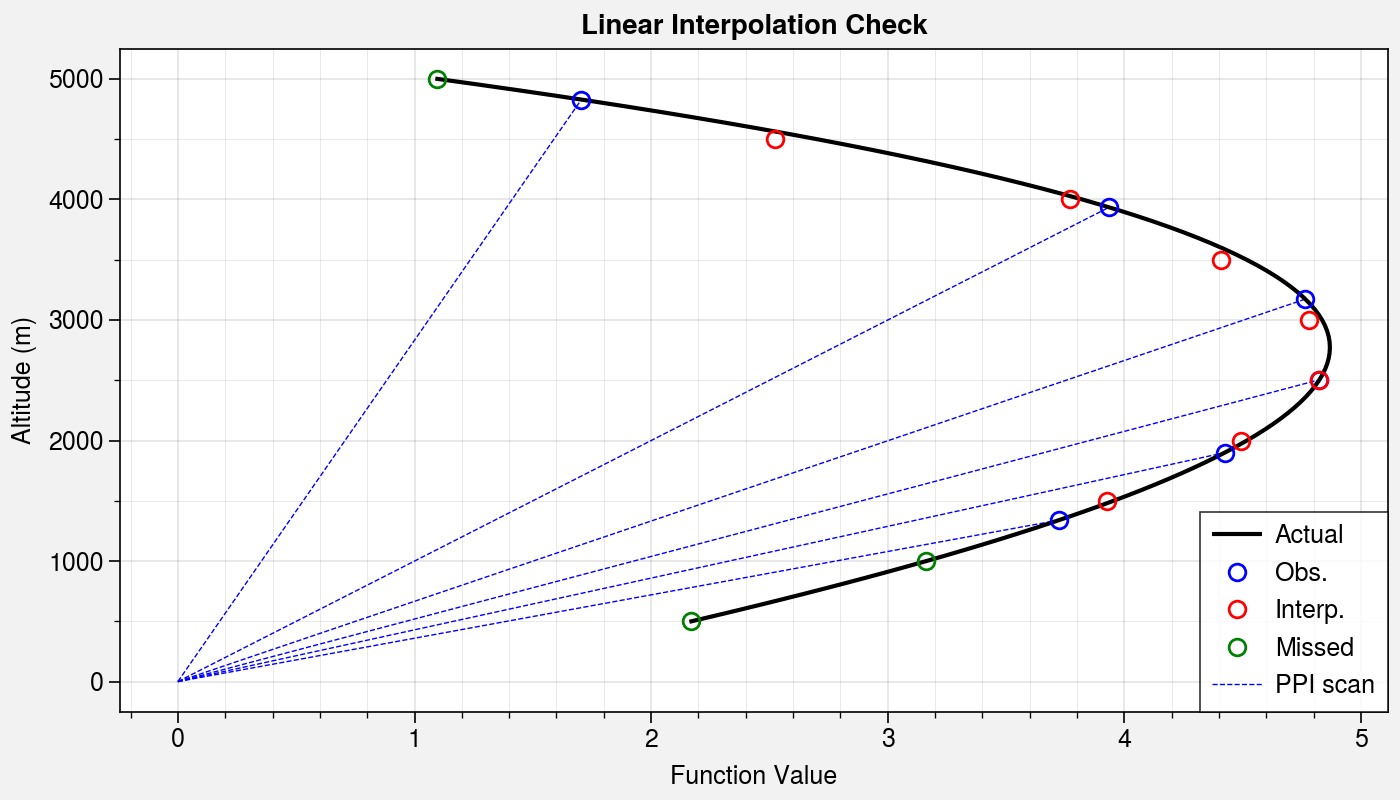

In [171]:
fig, axs = plot.subplots(figsize = (7,4))
for x,y in zip(fobp, zobp):
    h5 = axs.plot(x,y, 'b--', lw = 0.5, label = 'PPI scan')
    
h1 = axs.plot(f[:,yidx, xidx],z[:,yidx, xidx], 'k-', label = 'Actual')
h2 = axs.plot(np.squeeze(fobs), np.squeeze(zobs), 'bo', mfc = 'none', label = 'Obs.')
h3 = axs.plot(np.squeeze(f_lin), np.squeeze(zg), 'ro', mfc = 'none',label = 'Interp.')
h4 = axs.plot(np.squeeze(f_miss), np.squeeze(zg), 'go', mfc = 'none',label = 'Missed')

axs.set_yticks(np.squeeze(zg), minor=True)
axs.grid(which='minor', alpha=0.1)

axs.format(xlabel = 'Function Value', ylabel = 'Altitude (m)', suptitle = 'Linear Interpolation Check')
axs.legend([h1,h2,h3,h4, h5], loc='lr', ncols=1, center=False)
plot.show()